In [1]:
import os

import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
import dionysus as dion
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pt_activation.models.simple_mnist import CFF

In [2]:
%load_ext autoreload
%autoreload 2
BATCH_SIZE = 50
UP_TO = 100

In [3]:
torch.manual_seed(1)

In [4]:
kwargs = {'num_workers': 1, 'pin_memory': True}
test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])), batch_size=BATCH_SIZE, shuffle=False, **kwargs)

In [5]:
model_path = '/home/tgebhart/projects/pt_activation/logdir/models/cff_5-filters_5-kernel_size_50-fc1_relu-activation.pt'

In [6]:
device = torch.device("cpu")
model = CFF().to(device)
model.load_state_dict(torch.load(model_path))

In [7]:
model.eval()
test_loss = 0
correct = 0
t = 0
res_df = []
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output, arr = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
        pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
        filtrations = model.compute_dynamic_filtration_batch(data, arr)
        for i in range(len(filtrations)):
            print('filtration: ', i)
            m = dion.homology_persistence(filtrations[i])
            dgms = dion.init_diagrams(m, filtrations[i])
            row = {'diagrams':dgms, 'loss':output.numpy()[i][0], 'class':target.numpy()[i], 'prediction':pred.numpy()[i][0]}
            res_df.append(row)
        t += BATCH_SIZE
        if t >= UP_TO:
            break

Filtration: 0
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 2406144
Sorting filtration...
Filtration: 1
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 2406144
Sorting filtration...
Filtration: 2
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 2406144
Sorting filtration...
Filtration: 3
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 2406144
Sorting filtration...
Filtration: 4
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 2406144
Sorting filtration...
Filtration: 5
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 2406144
Sorting filtration...
Filtration: 6
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 2406144
Sorting filtration...
Filtration: 7
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 2406144
Sorting filtration...


filtration size 2406144
Sorting filtration...
Filtration: 10
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 2406144
Sorting filtration...
Filtration: 11
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 2406144
Sorting filtration...
Filtration: 12
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 2406144
Sorting filtration...
Filtration: 13
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 2406144
Sorting filtration...
Filtration: 14
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 2406144
Sorting filtration...
Filtration: 15
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 2406144
Sorting filtration...
Filtration: 16
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 2406144
Sorting filtration...
Filtration: 17
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([5

In [8]:
res_df = pd.DataFrame(res_df)

In [9]:
res_df.head()

,class,diagrams,loss,prediction
0,7,"[((3.50882,inf), (2.57837,2.13618), (2.25693,2...",-16.541109,7
1,2,"[((3.94421,inf), (3.65978,2.24202), (2.6674,2....",-14.073689,2
2,1,"[((2.13638,inf), (1.63544,0.494732), (1.62806,...",-11.218899,1
3,0,"[((3.89538,inf), (3.72959,1.66318), (3.37715,1...",-0.000212,0
4,4,"[((3.01336,inf), (2.88185,1.78146), (1.8465,1....",-14.076792,4


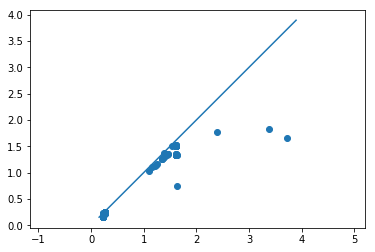

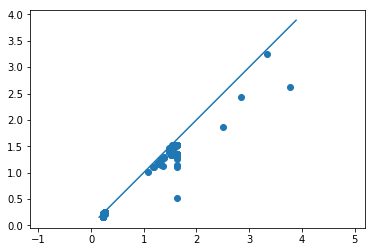

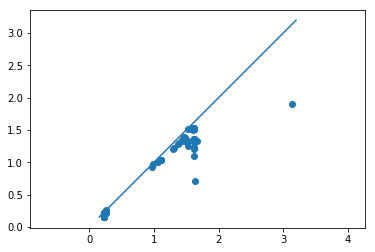

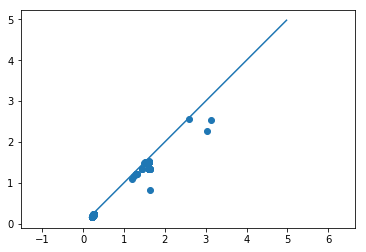

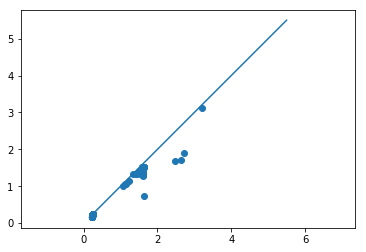

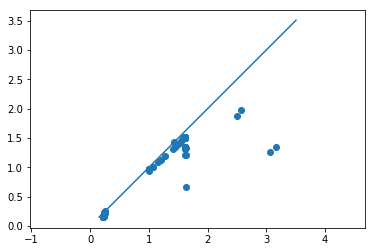

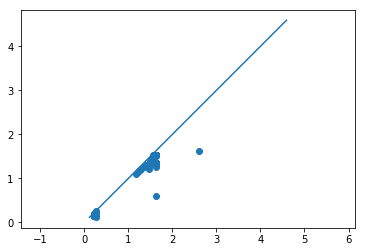

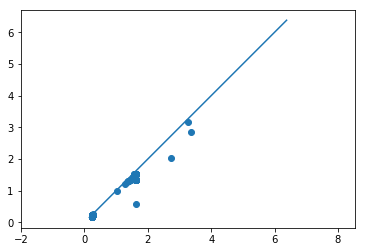

In [13]:
coi = 0
cois = res_df[res_df['class'] == coi]
for i in range(cois.shape[0]):
    dion.plot.plot_diagram(cois['diagrams'].iloc[i][0], show=True)

In [24]:
res_df.sort_values(by=['class'], inplace=True)
res_df.head()

,class,diagrams,loss,prediction
3,0,"[((3.89538,inf), (3.72959,1.66318), (3.37715,1...",-0.000212,0
28,0,"[((5.50068,inf), (3.19706,3.12521), (2.71895,1...",-0.000444,0
71,0,"[((6.37806,inf), (3.35754,2.86657), (3.26526,3...",-0.000004,0
69,0,"[((4.5917,inf), (2.59946,1.61706), (1.63544,0....",-0.000238,0
10,0,"[((3.88962,inf), (3.7662,2.62215), (3.32895,3....",-0.000079,0


In [25]:
dist_dim = res_df.shape[0]
print('Number rows: {}'.format(dist_dim))
dists = np.zeros(shape=(dist_dim,dist_dim))
cols = np.empty(shape=(dist_dim))

for i in range(0,dist_dim):
    print(i, '/', dist_dim)
    for j in range(0,dist_dim):
        if i != j:
            d1 = res_df['diagrams'].iloc[i][0]
            d2 = res_df['diagrams'].iloc[j][0]
            dists[i,j] = dion.wasserstein_distance(d1, d2, q=2)
    cols[i] = res_df['class'].iloc[i]

Number rows: 100
0 / 100
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100


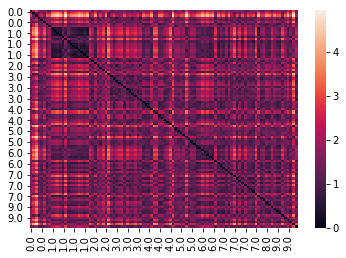

In [27]:
dists_df = pd.DataFrame(dists, index=cols, columns=cols)
sns.heatmap(dists_df)

In [28]:
dist_dim = res_df.shape[0]
print('Number rows: {}'.format(dist_dim))
dists = np.zeros(shape=(dist_dim,dist_dim))
cols = np.empty(shape=(dist_dim))

for i in range(0,dist_dim):
    print(i, '/', dist_dim)
    for j in range(0,dist_dim):
        if i != j:
            d1 = res_df['diagrams'].iloc[i][0]
            d2 = res_df['diagrams'].iloc[j][0]
            dists[i,j] = dion.bottleneck_distance(d1, d2)
    cols[i] = res_df['class'].iloc[i]

Number rows: 100
0 / 100
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100


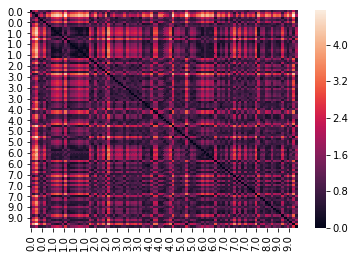

In [29]:
bottle_df = pd.DataFrame(dists, index=cols, columns=cols)
sns.heatmap(bottle_df)